<a href="https://colab.research.google.com/github/priyeshroy10155/Deep-learning-projects/blob/main/Autoencoder_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

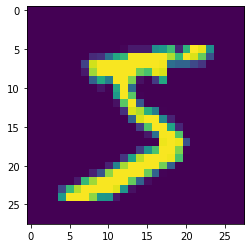

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train=x_train/255

In [ ]:
x_test=x_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
28*28

784

In [ ]:
784/2

392.0

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [ ]:
25/784

0.03188775510204082

In [ ]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
autoencoder=Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
autoencoder.fit(x_train,x_train,epochs=5,
                validation_data=[x_test,x_test])

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2460 - accuracy: 0.0925 - val_loss: 0.1990 - val_accuracy: 0.1435
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1837 - accuracy: 0.1659 - val_loss: 0.1759 - val_accuracy: 0.1735
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1589 - accuracy: 0.1975 - val_loss: 0.1513 - val_accuracy: 0.2020
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1468 - accuracy: 0.2137 - val_loss: 0.1435 - val_accuracy: 0.2164
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1411 - accuracy: 0.2222 - val_loss: 0.1380 - val_accuracy: 0.2213


In [ ]:
passed_images=autoencoder.predict(x_test[:10])

original image


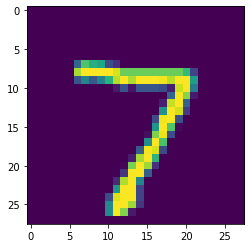

Attempted Reconstruction(after autoencoder)


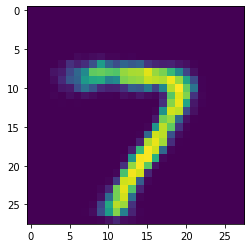

In [ ]:
n=0

print('original image')
plt.imshow(x_test[n])
plt.show()
print('Attempted Reconstruction(after autoencoder)')
plt.imshow(passed_images[n])

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample=GaussianNoise(0.2)

In [ ]:
noisey=sample(x_test[:10],training=True)

original


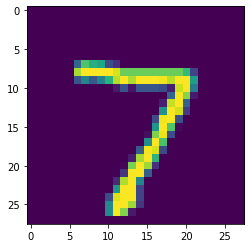

noise version


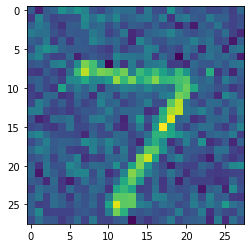

In [ ]:
n=0

print('original')
plt.imshow(x_test[n])
plt.show()
print('noise version')
plt.imshow(noisey[n])
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(101)
np.random.seed(101)
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [ ]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
noise_remover=Sequential([encoder,decoder])

In [ ]:
noise_remover.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
noise_remover.fit(x_train,x_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1695 - accuracy: 0.1824
Epoch 2/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1305 - accuracy: 0.2329
Epoch 3/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1214 - accuracy: 0.2452
Epoch 4/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1169 - accuracy: 0.2528
Epoch 5/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1131 - accuracy: 0.2585
Epoch 6/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1104 - accuracy: 0.2631
Epoch 7/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1084 - accuracy: 0.2669
Epoch 8/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1068 - accuracy: 0.2694


In [ ]:
ten_noisey_images=sample(x_test[:10],training=True)

In [ ]:
denoised=noise_remover(ten_noisey_images)

original image


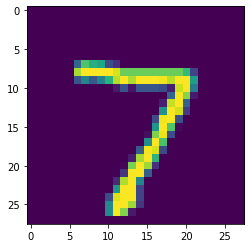

noiseadded image


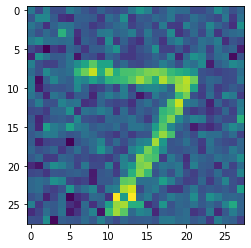

after noise removal from autoencoder


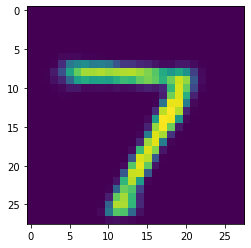

In [ ]:
n=0
print('original image')
plt.imshow(x_test[n])
plt.show()
print('noiseadded image')
plt.imshow(ten_noisey_images[n])
plt.show()
print('after noise removal from autoencoder')
plt.imshow(denoised[n])
plt.show()